# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/Colab Notebooks/Dataset/bank_transactions_data_2.csv"

df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

# SEKLIAS TENTANG DATASET
Dataset ini memberikan wawasan mendalam tentang perilaku transaksi dan pola aktivitas keuangan, yang ideal untuk mengeksplorasi deteksi penipuan dan identifikasi anomali. Dataset ini berisi 2.512 sampel data transaksi, mencakup berbagai atribut transaksi, demografi pelanggan, dan pola penggunaan. Setiap entri memberikan wawasan komprehensif tentang perilaku transaksi, memungkinkan analisis untuk keamanan keuangan dan aplikasi deteksi penipuan.

Fitur Utama:    

1. **TransactionID**: Pengenal alfanumerik unik untuk setiap transaksi

2. **AccountID**: Pengenal unik untuk setiap akun, dengan beberapa transaksi per akun.
3. **TransactionAmount**: Nilai moneter dari setiap transaksi, mencakup pengeluaran sehari-hari hingga pembelian dalam jumlah besar.

4. **TransactionDate**: Stempel waktu dari setiap transaksi, mencatat tanggal dan waktu transaksi.

5. **TransactionType**: Kolom kategorikal yang menunjukkan jenis transaksi, yaitu 'Kredit' atau 'Debit'.
6. **Location**: Lokasi geografis tempat transaksi terjadi, direpresentasikan dengan nama kota di AS.
7. **DeviceID**: Pengenal alfanumerik untuk perangkat yang digunakan dalam transaksi.
8. **IP Address**: Alamat IPv4 yang terkait dengan transaksi, dengan perubahan sesekali untuk beberapa akun.
9. **MerchantID**: Pengenal unik untuk pedagang, menunjukkan pedagang yang sering digunakan dan pedagang yang tidak biasa untuk setiap akun.
10. **AccountBalance**: Saldo akun setelah transaksi, dengan korelasi logis berdasarkan jenis dan jumlah transaksi.
11. **PreviousTransactionDate**: Stempel waktu dari transaksi sebelumnya untuk akun tersebut, membantu dalam menghitung frekuensi transaksi.
12. **Channel**: Saluran yang digunakan untuk melakukan transaksi (misalnya, Online, ATM, Cabang).
13. **CustomerAge**: Usia pemegang akun, dengan pengelompokan logis berdasarkan pekerjaan.
14. **CustomerOccupation**: Pekerjaan pemegang akun (misalnya, Dokter, Insinyur, Mahasiswa, Pensiunan), yang mencerminkan pola pendapatan.
15. **TransactionDuration**: Durasi transaksi dalam hitungan detik, bervariasi berdasarkan jenis transaksi.
16. **LoginAttempts**: Jumlah upaya login sebelum transaksi, dengan nilai yang lebih tinggi dapat menunjukkan potensi anomali.


In [ ]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [ ]:
df.shape

(2512, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [ ]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


# **Informasi Sementara dari Dataset**

Terdapat 2512 baris dan 16 kolom dari transaksi bank

## **Tipe Dataset**

Tipe data campuran antara kategorikal dan numerical

### **Data kategorikal(Object)**
1. TransactionID

    ID Unik setiap transaksi
2. AccountID
  
  ID Unik setiap Account
3. TransactionDate
  
  Bertipe Tanggal/Date
4. TransactionType
  
  Ada 2 kategori

  - Debit
  - Kredit
5. Location

  Jumlah kategori unik di Location: 43

  - Fort Worth          
  - Los Angeles         
  - Oklahoma City       
  - Charlotte           
  - Tucson              
  - Philadelphia        
  - Omaha               
  - Miami               
  - Detroit             
  - Houston             
  - Memphis             
  - Denver              
  - Kansas City         
  - Boston              
  - Mesa                
  - Atlanta             
  - Seattle             
  - Colorado Springs    
  - Jacksonville        
  - Fresno              
  - Chicago             
  - Austin              
  - San Jose            
  - Raleigh             
  - San Antonio         
  - San Diego           
  - Indianapolis        
  - New York           
  - San Francisco       
  - Nashville           
  - Milwaukee           
  - Las Vegas           
  - Virginia Beach      
  - Phoenix             
  - Columbus            
  - Sacramento          
  - Baltimore           
  - Louisville          
  - Dallas              
  - Washington          
  - El Paso             
  - Portland            
  - Albuquerque         

6. DeviceID
  
  ID unik setiap device
7. IP Address

  IP Adress dari setiap transaksi
8. MerchantID

  ID Unik di Merchant
9. Channel

  Ada 3 kategori
  - Branch
  - ATM
  - Online
10. CustomerOccupation
  
  Ada 4 kategori
  - Student
  - Doctor
  - Engineer
  - Retired

11. PreviousTransactionDate

  Bertipe Tanggal/Date

### **Data kategorikal(int64 dan float64)**


1. TransactionAmount **(float64)**
2. AccountBalance **(float64)**
3. CustomerAge **(int64)**
4. TransactionDuration **(int64)**
5. LoginAttempts **(int64)**

# **PLOTTING**

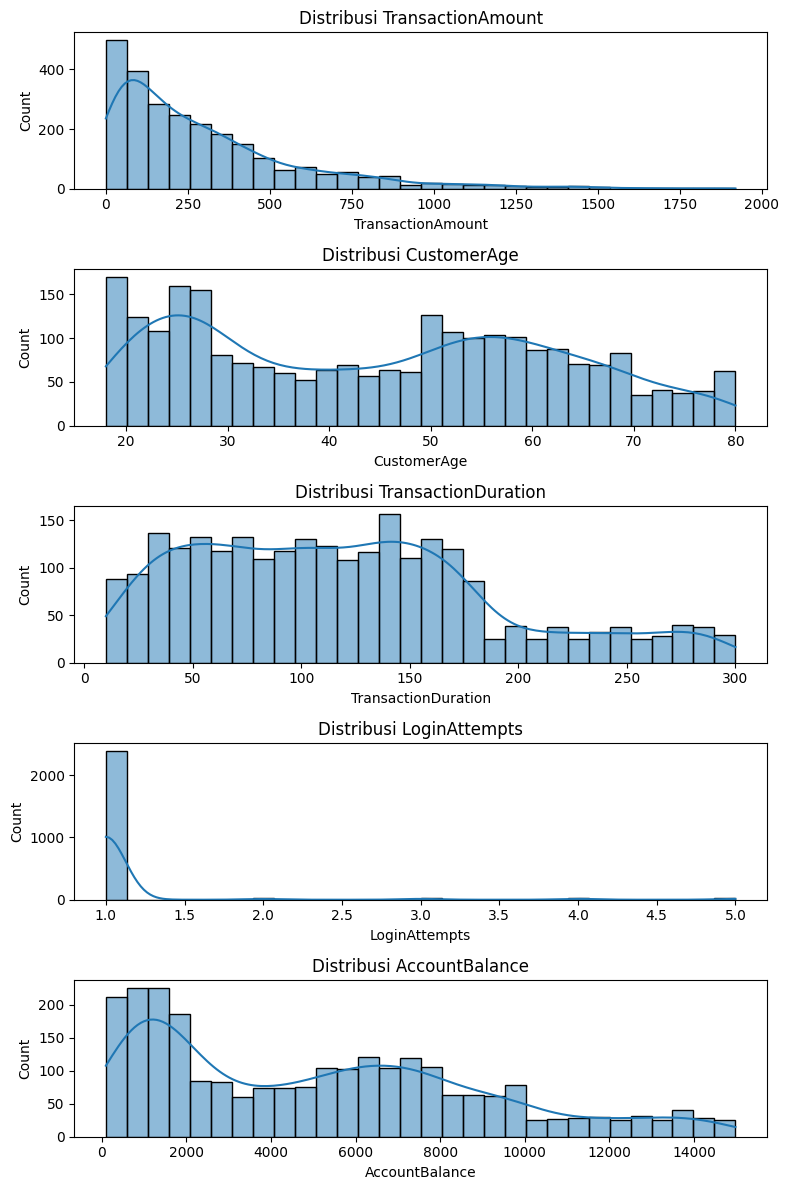

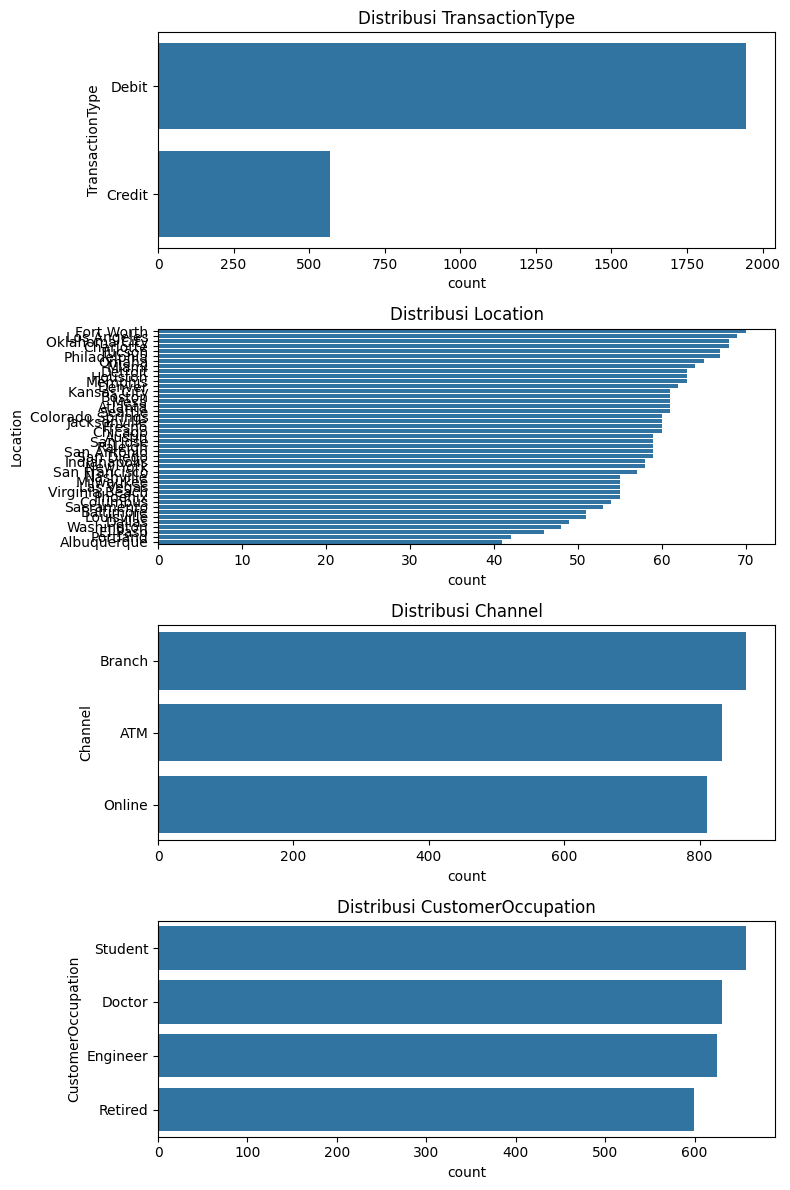

In [ ]:
# Plot distribusi fitur numerik
numeric_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

fig, axes = plt.subplots(len(numeric_features), 1, figsize=(8, 12))
for i, feature in enumerate(numeric_features):
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature}')
plt.tight_layout()
plt.show()

# Plot distribusi fitur kategorikal
categorical_features = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
fig, axes = plt.subplots(len(categorical_features), 1, figsize=(8, 12))
for i, feature in enumerate(categorical_features):
    sns.countplot(y=df[feature], order=df[feature].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature}')
plt.tight_layout()
plt.show()

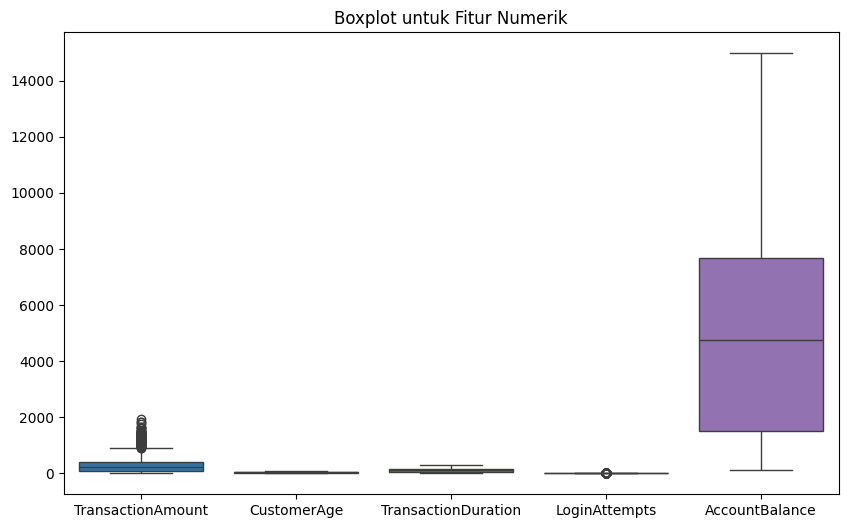

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_features])
plt.title('Boxplot untuk Fitur Numerik')
plt.show()

<Figure size 1000x600 with 0 Axes>

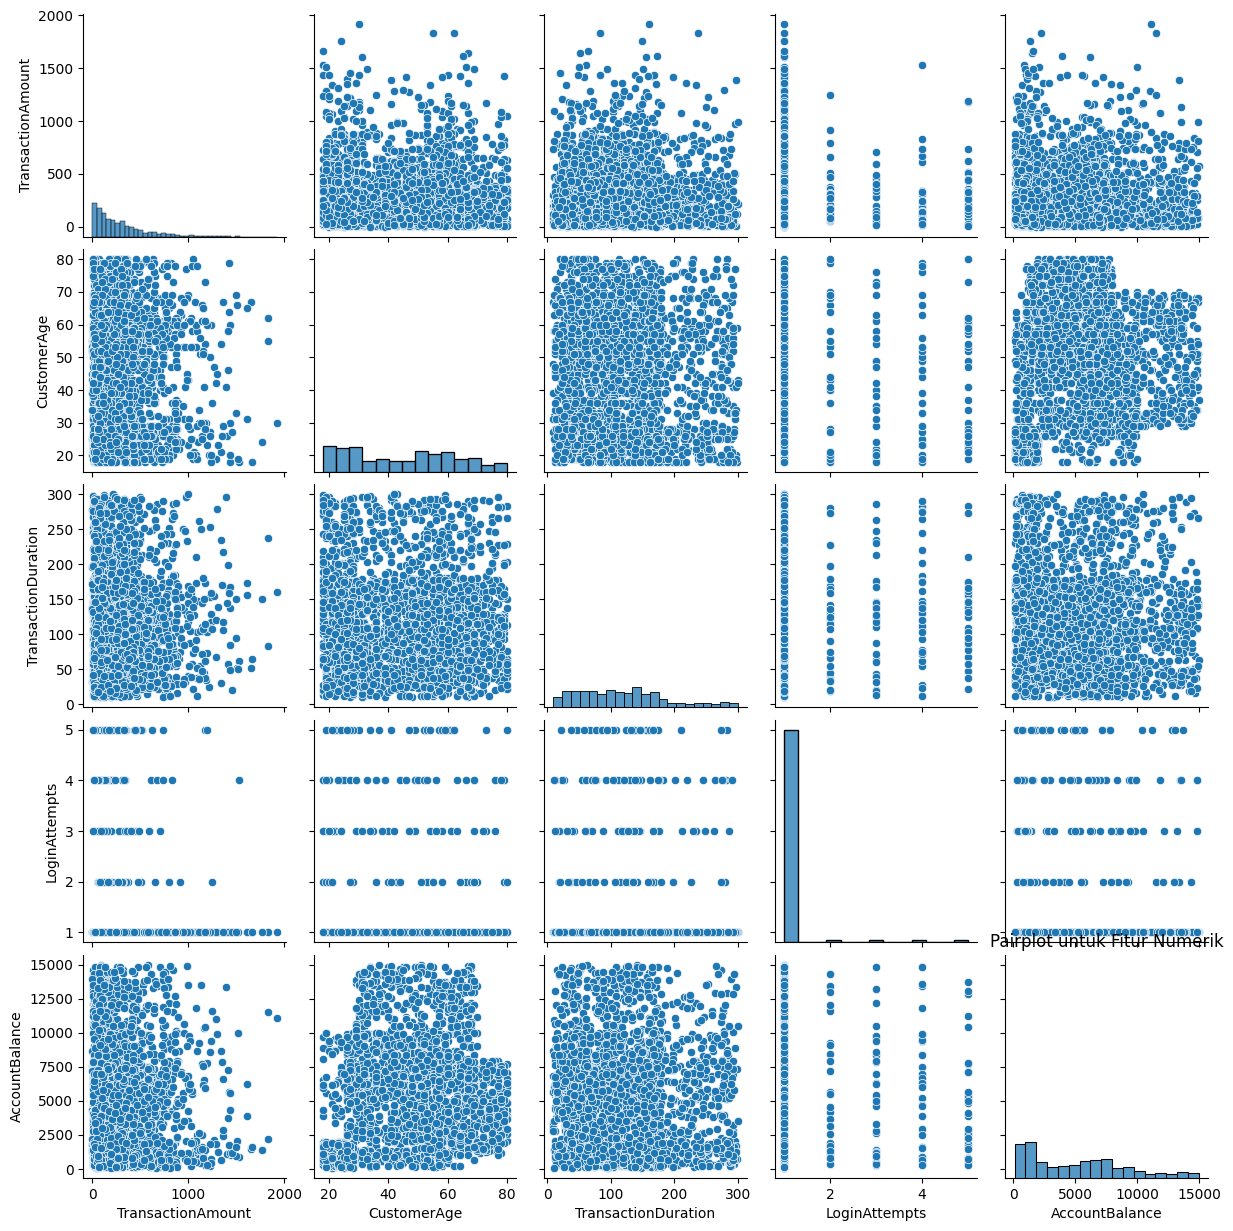

In [ ]:
plt.figure(figsize=(10, 6))
sns.pairplot(df[numeric_features])
plt.title('Pairplot untuk Fitur Numerik')
plt.show()

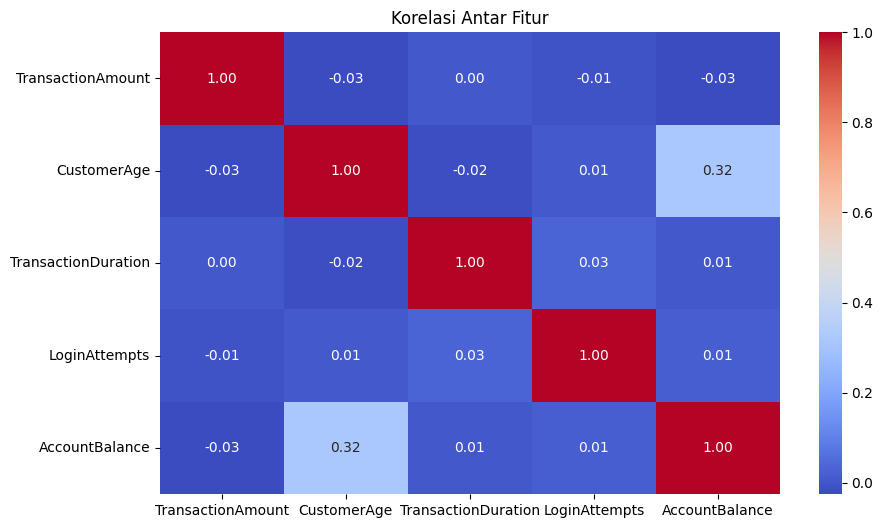

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.show()



# **Informasi dari distribusi data setiap fitur:**

## **Fitur numerik:**
- Distribusi TransactionAmount (Jumlah Transaksi)

  - Distribusi sangat condong ke kiri (skewed right), artinya kebanyakan transaksi bernilai kecil.
  - Sedikit transaksi bernilai besar (lebih dari 1000), kemungkinan transaksi besar lebih jarang terjadi.
  - Ini mungkin menunjukkan bahwa mayoritas pengguna melakukan transaksi harian dalam jumlah kecil.

- Distribusi CustomerAge (Usia Pelanggan)

  - Dua puncak (bimodal distribution):
      - Puncak pertama sekitar usia 20-30 tahun → Mungkin mewakili kelompok mahasiswa/muda yang aktif dalam transaksi.
      - Puncak kedua sekitar usia 50-60 tahun → Bisa jadi kelompok pensiunan atau profesional yang sudah mapan.
  - Sebaran usia cukup luas, artinya bank ini melayani berbagai kelompok umur.

- Distribusi TransactionDuration (Durasi Transaksi)
  - Sebaran hampir merata antara 0 hingga 200 detik, lalu menurun setelahnya.
  - Mayoritas transaksi selesai dalam waktu kurang dari 200 detik, menunjukkan sistem transaksi cukup efisien.
  - Beberapa transaksi lebih lama dari 250 detik, ini bisa menjadi anomali atau transaksi yang membutuhkan verifikasi tambahan.

- Distribusi LoginAttempts (Jumlah Percobaan Login)
  - Mayoritas pengguna hanya login 1 kali sebelum berhasil, menunjukkan tidak banyak kesalahan input password.
  - Beberapa kasus memiliki login attempts >3, ini bisa menjadi indikasi aktivitas mencurigakan seperti percobaan login yang gagal berulang kali.

- Distribusi AccountBalance (Saldo Akun)
  - Dua kelompok besar:
    - Kelompok pertama dengan saldo rendah (0 - 2000) → Bisa jadi mayoritas pengguna memiliki rekening dengan saldo terbatas.
    - Kelompok kedua sekitar 5000 - 8000 → Menunjukkan ada kelompok dengan saldo lebih stabil.
  - Ada sedikit outlier dengan saldo di atas 10.000 - 15.000, yang kemungkinan adalah nasabah dengan simpanan besar.


## **Fitur kategorikal:**
- TransactionType

    - Transaksi Debit jauh lebih banyak dibandingkan Credit. Ini menunjukkan bahwa kebanyakan transaksi adalah pengeluaran (misalnya pembelian, transfer keluar).
- Distribusi Location
    - Lokasi tersebar luas, tetapi tidak ada lokasi yang sangat mendominasi. Setiap lokasi memiliki jumlah transaksi yang hampir merata dengan sedikit variasi.
- Distribusi Channel
    - Branch, ATM, dan Online memiliki jumlah transaksi yang hampir seimbang. Ini menunjukkan bahwa pelanggan menggunakan semua metode transaksi secara proporsional, tanpa ada channel yang terlalu dominan.

- Distribusi CustomerOccupation
    - Empat profesi utama yang terlihat: Student, Doctor, Engineer, Retired.
    
    Jumlahnya relatif seimbang, artinya tidak ada satu profesi yang mendominasi transaksi.

    Mahasiswa memiliki jumlah transaksi yang tinggi, kemungkinan besar karena transaksi kecil dan sering.

    Doctor & Engineer juga aktif dalam transaksi, mungkin terkait dengan tingkat pendapatan yang lebih tinggi.

# **Kesimpulan Awal**

1. Mayoritas transaksi bernilai kecil, dengan beberapa transaksi besar yang jarang terjadi.
2. Usia pelanggan tersebar cukup luas, dengan dua kelompok utama (20-30 tahun & 50-60 tahun).
3. Durasi transaksi biasanya di bawah 200 detik, menunjukkan efisiensi yang baik.
4. Sebagian besar pengguna hanya perlu satu kali login, tetapi ada beberapa yang mengalami kesulitan login.
5. Distribusi saldo rekening menunjukkan mayoritas nasabah memiliki saldo rendah, tetapi ada beberapa dengan saldo besar.
6. Transaksi debit lebih dominan → lebih banyak pengeluaran daripada pemasukan.
7. Transaksi tersebar merata di berbagai lokasi.
8. Semua channel digunakan secara proporsional.
9. Semua profesi memiliki jumlah transaksi yang seimbang, tapi mahasiswa tampaknya cukup aktif bertransaksi.


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
# Mengecek jumlah data yang hilang di setiap kolom
missing_values = df.isnull().sum()

# Menampilkan hasil
missing_values

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


# **ENCODING FITUR**


## **Encoding Fitur kategorikal(Object)**
- AccountID
- TransactionDate
- TransactionType
- Location
- DeviceID
- IP Address
- MerchantID
- Channel
- CustomerOccupation
- PreviousTransactionDate

Namun hanya beberapa fitur yang akan digunakan karena ada fitur yang tidak ada kaittanya untuk clustering seperti

# **Fitur yang Tidak Relevan untuk Clustering:**
 - AccountID
 - DeviceID
 - IP Address
 - MerchantID
 - TransactionDate
 - PreviousTransactionDate


## Fitur Kategorikal yang dapat dijadikan sebagai pertimbangan untuk clustering

- TransactionType
- Location
- Channel
- CustomerOccupation


### METODE ENCODING YANG DIGUNAKAN


Metode encoding yang digunakan akan berbeda setiap fitur sesuai dengan karakteristik dari fitur

- TransactionType

    Memiliki 2 kategori, maka digunakan
    
    One Hot Encoding

- Location

    Memiliki 43 kategori, maka digunakan
    
    Frequency Encoding/Count Encoding

- Channel

    Memiliki 3 kategori, maka digunakan

    One Hot Encoding

- CustomerOccupation

    Memiliki 4 kategori, maka digunakan

    One Hot Encoding



In [ ]:
# Drop unnecessary columns
df_select = df.drop(columns=["TransactionType", "Channel", "TransactionID", "AccountID", "DeviceID", "MerchantID", "Location",  "TransactionDate", "PreviousTransactionDate", "TransactionDuration", "IP Address"])

In [ ]:
df_select

,TransactionAmount,CustomerAge,CustomerOccupation,LoginAttempts,AccountBalance
0,14.09,70,Doctor,1,5112.21
1,376.24,68,Doctor,1,13758.91
2,126.29,19,Student,1,1122.35
3,184.50,26,Student,1,8569.06
4,13.45,26,Student,1,7429.40
...,...,...,...,...,...
2507,856.21,33,Doctor,1,12690.79
2508,251.54,48,Doctor,1,254.75
2509,28.63,56,Retired,1,3382.91
2510,185.97,23,Student,1,1776.91


In [ ]:
# # Binning pada CustomerAge untuk membuat kategori umur
# bins = [18, 30, 45, 60, 80]
# labels = ["Young", "Adult", "Middle-Aged", "Senior"]
# df_select["AgeGroup"] = pd.cut(df_select["CustomerAge"], bins=bins, labels=labels)

In [ ]:
# # 3. Deteksi dan penanganan outlier dengan metode IQR
# numerical_features = ["TransactionAmount", "AccountBalance", "CustomerAge"]
# Q1 = df_select[numerical_features].quantile(0.25)
# Q3 = df_select[numerical_features].quantile(0.75)
# IQR = Q3 - Q1

# # Menentukan batas bawah dan atas untuk outlier
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Menghapus outlier
# df_cleaned = df_select[~((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound)).any(axis=1)]

# df_cleaned

In [ ]:
df_cleaned = df_select.copy()

In [ ]:
# # Deteksi dan Penanganan Outlier pada data yang telah distandardisasi
# z_scores = np.abs(zscore(x))
# mask = (z_scores < 3).all(axis=1)
# df_scaled = x[mask]

# df = df.iloc[mask.nonzero()[0]]

In [ ]:
df_cleaned

,TransactionAmount,CustomerAge,CustomerOccupation,LoginAttempts,AccountBalance
0,14.09,70,Doctor,1,5112.21
1,376.24,68,Doctor,1,13758.91
2,126.29,19,Student,1,1122.35
3,184.50,26,Student,1,8569.06
4,13.45,26,Student,1,7429.40
...,...,...,...,...,...
2507,856.21,33,Doctor,1,12690.79
2508,251.54,48,Doctor,1,254.75
2509,28.63,56,Retired,1,3382.91
2510,185.97,23,Student,1,1776.91


In [ ]:
# # 4. Encoding variabel kategorikal menggunakan Label Encoding
# categorical_features = ["TransactionType", "Channel", "CustomerOccupation"]
# # , "AgeGroup"
# label_encoders = {}

# for col in categorical_features:
#     le = LabelEncoder()
#     df_cleaned[col] = le.fit_transform(df_cleaned[col])
#     label_encoders[col] = le

In [ ]:
# 2. Normalisasi fitur numerik menggunakan StandardScaler
# numerical_features = ["TransactionAmount", "AccountBalance"]
numerical_features = ["TransactionAmount", "AccountBalance", "CustomerAge", "LoginAttempts"]

scaler = MinMaxScaler()
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

In [ ]:
df_cleaned

,TransactionAmount,CustomerAge,CustomerOccupation,LoginAttempts,AccountBalance
0,0.007207,0.838710,Doctor,0.0,0.336832
1,0.195940,0.806452,Doctor,0.0,0.918055
2,0.065680,0.016129,Student,0.0,0.068637
3,0.096016,0.129032,Student,0.0,0.569198
4,0.006874,0.129032,Student,0.0,0.492591
...,...,...,...,...,...
2507,0.446074,0.241935,Doctor,0.0,0.846257
2508,0.130953,0.483871,Doctor,0.0,0.010318
2509,0.014785,0.612903,Retired,0.0,0.220590
2510,0.096782,0.080645,Student,0.0,0.112636


In [ ]:
df_cleaned.columns

Index(['TransactionAmount', 'CustomerAge', 'CustomerOccupation',
       'LoginAttempts', 'AccountBalance'],
      dtype='object')

In [ ]:
# Menggunakan pd.get_dummies() untuk OHE
# One-Hot Encoding dengan dtype=int agar bernilai numerik (0 dan 1)
df_cleaned = pd.get_dummies(df_cleaned, columns=["CustomerOccupation"], dtype=int)

In [ ]:
df_cleaned

,TransactionAmount,CustomerAge,LoginAttempts,AccountBalance,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,0.007207,0.838710,0.0,0.336832,1,0,0,0
1,0.195940,0.806452,0.0,0.918055,1,0,0,0
2,0.065680,0.016129,0.0,0.068637,0,0,0,1
3,0.096016,0.129032,0.0,0.569198,0,0,0,1
4,0.006874,0.129032,0.0,0.492591,0,0,0,1
...,...,...,...,...,...,...,...,...
2507,0.446074,0.241935,0.0,0.846257,1,0,0,0
2508,0.130953,0.483871,0.0,0.010318,1,0,0,0
2509,0.014785,0.612903,0.0,0.220590,0,0,1,0
2510,0.096782,0.080645,0.0,0.112636,0,0,0,1


In [ ]:
# x = df_cleaned.drop(columns=["CustomerAge"])

In [ ]:
# x = df_cleaned.drop(columns=["TransactionType_Debit"])

In [ ]:
df_cleaned.columns

Index(['TransactionAmount', 'CustomerAge', 'LoginAttempts', 'AccountBalance',
       'CustomerOccupation_Doctor', 'CustomerOccupation_Engineer',
       'CustomerOccupation_Retired', 'CustomerOccupation_Student'],
      dtype='object')

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
numerical_cols = ['TransactionAmount', 'CustomerAge', 'AccountBalance',"LoginAttempts",
       'CustomerOccupation_Doctor',
       'CustomerOccupation_Engineer', 'CustomerOccupation_Retired',
       'CustomerOccupation_Student']
X = df_cleaned[numerical_cols]
kmeans = KMeans(n_clusters=4)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
X


,TransactionAmount,CustomerAge,AccountBalance,LoginAttempts,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,Cluster
0,0.007207,0.838710,0.336832,0.0,1,0,0,0,3
1,0.195940,0.806452,0.918055,0.0,1,0,0,0,3
2,0.065680,0.016129,0.068637,0.0,0,0,0,1,1
3,0.096016,0.129032,0.569198,0.0,0,0,0,1,1
4,0.006874,0.129032,0.492591,0.0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
2507,0.446074,0.241935,0.846257,0.0,1,0,0,0,3
2508,0.130953,0.483871,0.010318,0.0,1,0,0,0,3
2509,0.014785,0.612903,0.220590,0.0,0,0,1,0,0
2510,0.096782,0.080645,0.112636,0.0,0,0,0,1,1


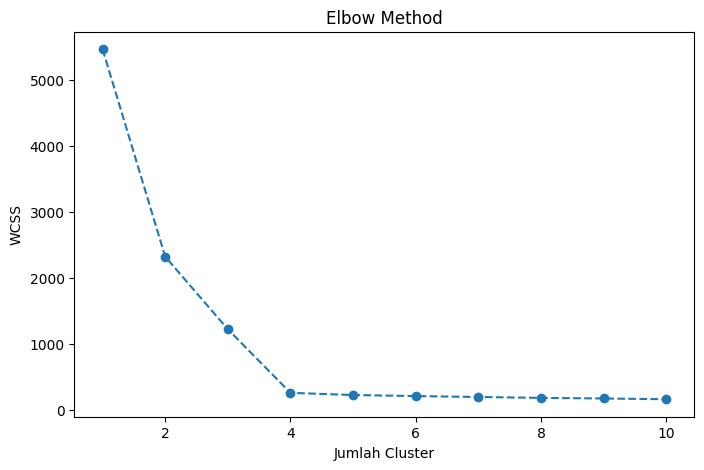

In [ ]:
# Menentukan jumlah cluster optimal menggunakan Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [ ]:
clusters = kmeans.fit_predict(X)
X['Cluster'] = clusters

kmeans.fit(X)

# Evaluasi clustering menggunakan Silhouette Score
sil_score = silhouette_score(X, X['Cluster'])
print(f'Silhouette Score: {sil_score:.4f}')

<ipython-input-29-a94e10a92b67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = clusters


Silhouette Score: 0.7879


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

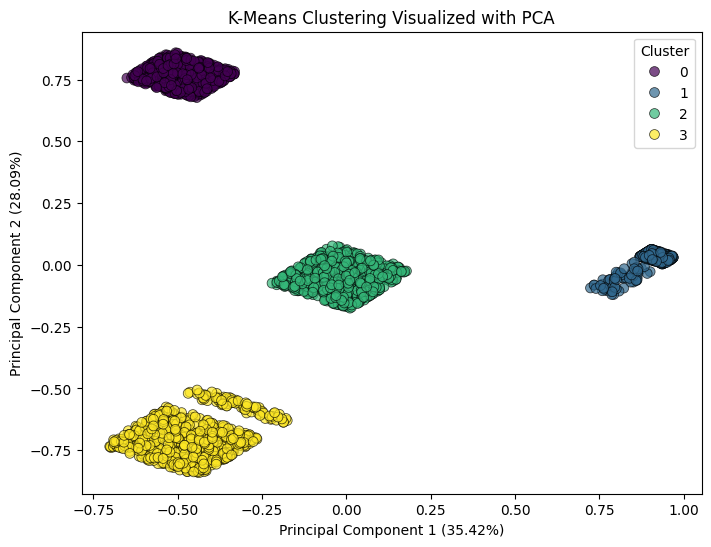

Explained variance ratio: [0.35415926 0.28088385]
Total explained variance: 0.6350431121553043


In [ ]:
from sklearn.decomposition import PCA
explained_variance = pca.explained_variance_ratio_

# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X[numerical_cols])

# Konversi hasil PCA ke DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = X['Cluster']

# Visualisasi hasil clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=50, alpha=0.7, edgecolors='k')
plt.title('K-Means Clustering Visualized with PCA')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}%)')
plt.legend(title='Cluster')
plt.show()


print("Explained variance ratio:", explained_variance)
print("Total explained variance:", np.sum(explained_variance))

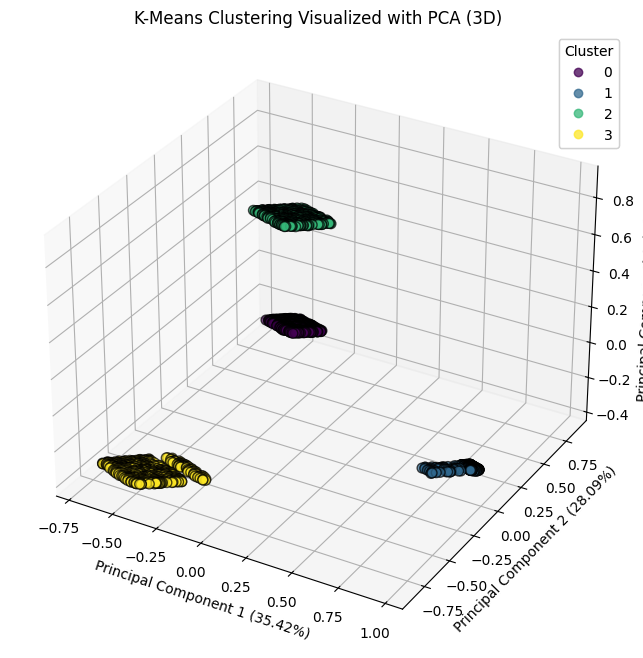

Explained variance ratio: [0.35415926 0.28088385 0.26392012]
Total explained variance: 0.8989632325799888


In [ ]:

# Reduksi dimensi dengan PCA (3 komponen)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X[numerical_cols])

# Konversi hasil PCA ke DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = X['Cluster']

# Visualisasi hasil clustering dalam 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D dengan warna sesuai cluster
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'],
                     c=pca_df['Cluster'], cmap='viridis', s=50, alpha=0.7, edgecolors='k')

ax.set_title('K-Means Clustering Visualized with PCA (3D)')
ax.set_xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
ax.set_ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
ax.set_zlabel(f'Principal Component 3 ({pca.explained_variance_ratio_[2]*100:.2f}%)')

# Tambahkan legend berdasarkan cluster
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

plt.show()

# Menampilkan varians yang dijelaskan oleh tiap komponen
print("Explained variance ratio:", explained_variance)
print("Total explained variance:", np.sum(explained_variance))


In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:

# Daftar kolom yang merupakan hasil One-Hot Encoding
occupation_columns = ['CustomerOccupation_Doctor', 'CustomerOccupation_Engineer',
                      'CustomerOccupation_Retired', 'CustomerOccupation_Student']

# Mengembalikan ke bentuk kategori asli
X['CustomerOccupation'] = X[occupation_columns].idxmax(axis=1).str.replace('CustomerOccupation_', '')

# Hapus kolom one-hot encoded jika tidak diperlukan lagi
X.drop(columns=occupation_columns, inplace=True)

print(X[['CustomerOccupation']].head())


  CustomerOccupation
0             Doctor
1             Doctor
2            Student
3            Student
4            Student


<ipython-input-39-94052ad117cc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CustomerOccupation'] = X[occupation_columns].idxmax(axis=1).str.replace('CustomerOccupation_', '')
<ipython-input-39-94052ad117cc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=occupation_columns, inplace=True)


In [ ]:
# Pastikan scaler sudah dilatih sebelumnya
scaler = MinMaxScaler()
scaler.fit(df_select[['TransactionAmount', 'CustomerAge', 'AccountBalance', 'LoginAttempts']])  # Sesuaikan dengan data sebelum scaling

# Inverse transform kembali ke nilai asli
X[['TransactionAmount', 'CustomerAge', 'AccountBalance', 'LoginAttempts']] = scaler.inverse_transform(
    X[['TransactionAmount', 'CustomerAge', 'AccountBalance', 'LoginAttempts']]
)

<ipython-input-41-b726a0f3f745>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['TransactionAmount', 'CustomerAge', 'AccountBalance', 'LoginAttempts']] = scaler.inverse_transform(


In [ ]:
X

,TransactionAmount,CustomerAge,AccountBalance,LoginAttempts,Cluster,CustomerOccupation
0,14.09,70.0,5112.21,1.0,3,Doctor
1,376.24,68.0,13758.91,1.0,3,Doctor
2,126.29,19.0,1122.35,1.0,1,Student
3,184.50,26.0,8569.06,1.0,1,Student
4,13.45,26.0,7429.40,1.0,1,Student
...,...,...,...,...,...,...
2507,856.21,33.0,12690.79,1.0,3,Doctor
2508,251.54,48.0,254.75,1.0,3,Doctor
2509,28.63,56.0,3382.91,1.0,0,Retired
2510,185.97,23.0,1776.91,1.0,1,Student


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# X[['TransactionAmount', 'CustomerAge', 'AccountBalance', 'LoginAttempts']] = scaler.inverse_transform(X[['TransactionAmount', 'CustomerAge', 'AccountBalance', 'LoginAttempts']])

<ipython-input-36-1daafe3cd2db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['TransactionAmount', 'CustomerAge', 'AccountBalance', 'LoginAttempts']] = scaler.inverse_transform(X[['TransactionAmount', 'CustomerAge', 'AccountBalance', 'LoginAttempts']])


In [ ]:
X

,TransactionAmount,CustomerAge,AccountBalance,LoginAttempts,Cluster,CustomerOccupation
0,14.09,70.0,5112.21,1.0,3,Doctor
1,376.24,68.0,13758.91,1.0,3,Doctor
2,126.29,19.0,1122.35,1.0,1,Student
3,184.50,26.0,8569.06,1.0,1,Student
4,13.45,26.0,7429.40,1.0,1,Student
...,...,...,...,...,...,...
2507,856.21,33.0,12690.79,1.0,3,Doctor
2508,251.54,48.0,254.75,1.0,3,Doctor
2509,28.63,56.0,3382.91,1.0,0,Retired
2510,185.97,23.0,1776.91,1.0,1,Student


In [ ]:
df['Cluster'] = X['Cluster']

In [ ]:
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,3
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,3
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,1
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,1
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29,3
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42,3
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39,0
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Distribusi Jumlah Data per Cluster:
Cluster
1    657
3    631
2    625
0    599
Name: count, dtype: int64


<ipython-input-47-424a53bfeb08>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


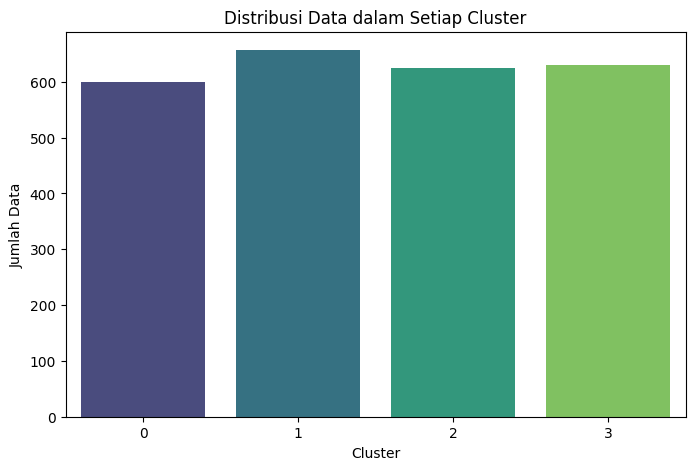

In [ ]:
# Menampilkan distribusi jumlah data di setiap cluster
cluster_counts = df["Cluster"].value_counts()
print("Distribusi Jumlah Data per Cluster:")
print(cluster_counts)

# Visualisasi distribusi cluster
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Data dalam Setiap Cluster")
plt.show()

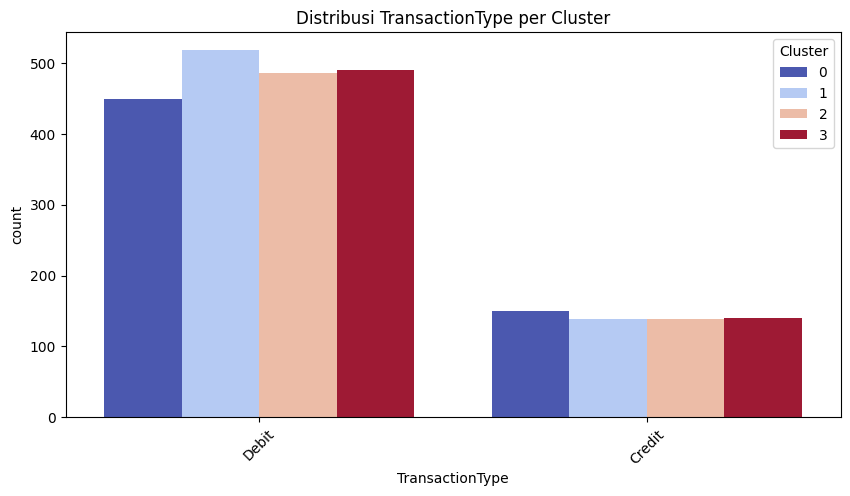

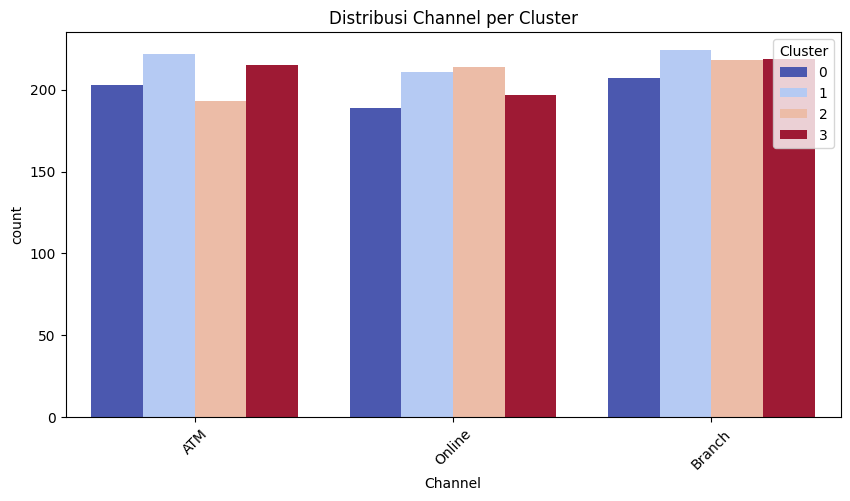

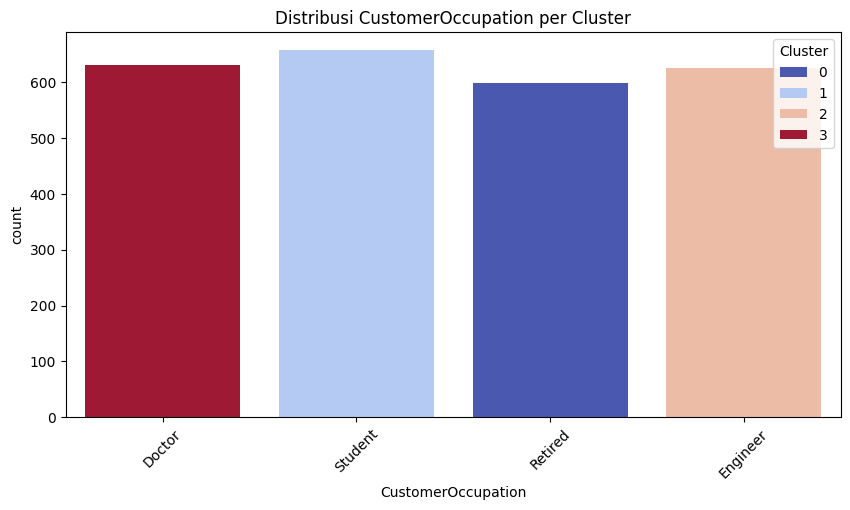

In [ ]:
# 3. Distribusi berdasarkan kategori
categorical_features = ['TransactionType', 'Channel', 'CustomerOccupation']
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature, hue='Cluster', palette='coolwarm')
    plt.title(f'Distribusi {feature} per Cluster')
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-64-56ef349381bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='TransactionAmount', palette='coolwarm')


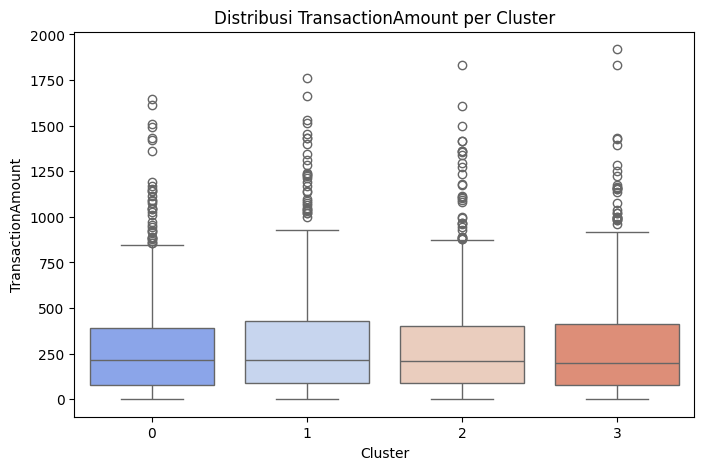

In [ ]:
# 4. Distribusi umur pelanggan berdasarkan cluster
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Cluster', y='TransactionAmount', palette='coolwarm')
plt.title('Distribusi TransactionAmount per Cluster')
plt.xlabel('Cluster')
plt.ylabel('TransactionAmount')
plt.show()


<ipython-input-52-fa4096818930>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='CustomerAge', palette='coolwarm')


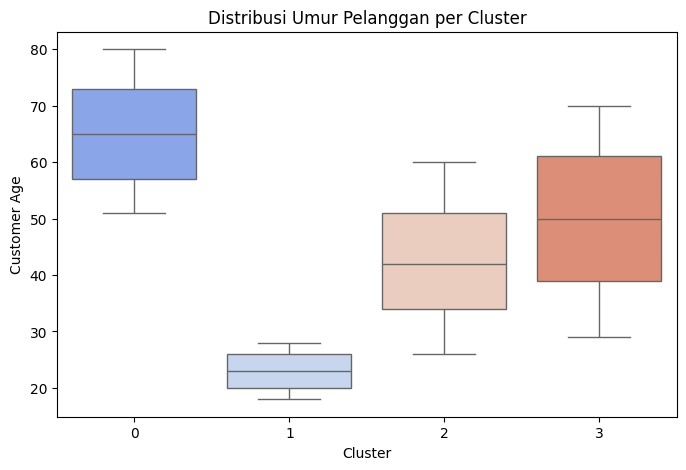

In [ ]:
# 4. Distribusi umur pelanggan berdasarkan cluster
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Cluster', y='CustomerAge', palette='coolwarm')
plt.title('Distribusi Umur Pelanggan per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customer Age')
plt.show()


<ipython-input-56-3f6f05c236c5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='AccountBalance', palette='coolwarm')


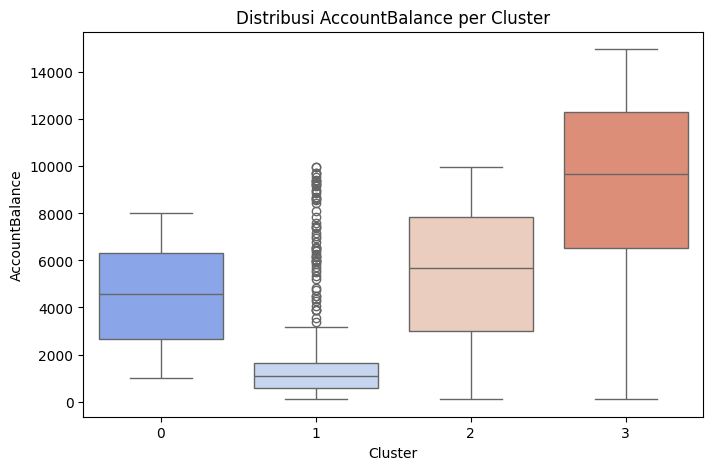

In [ ]:
# 4. Distribusi umur pelanggan berdasarkan cluster
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Cluster', y='AccountBalance', palette='coolwarm')
plt.title('Distribusi AccountBalance per Cluster')
plt.xlabel('Cluster')
plt.ylabel('AccountBalance')
plt.show()

In [ ]:
# Mengelompokkan berdasarkan Cluster
clustered_numerical_summary = X.groupby('Cluster')[numerical_cols].agg(['mean', 'median', 'min', 'max'])
print("Statistik Variabel Numerik per Cluster:")
print(clustered_numerical_summary)

# Menghitung modus untuk variabel kategori per klaster
clustered_categorical_mode = X.groupby('Cluster')[categorical_cols].agg(lambda x: x.mode().iloc[0])
print("\nModus Variabel Kategori per Cluster:")
print(clustered_categorical_mode)


Statistik Variabel Numerik per Cluster:
        TransactionAmount                        CustomerAge               \
                     mean  median   min      max        mean median   min   
Cluster                                                                     
0              294.533673  213.33  1.21  1647.74   65.315526   65.0  51.0   
1              313.220746  215.94  0.26  1762.28   23.068493   23.0  18.0   
2              289.040096  211.36  0.32  1830.00   42.648000   42.0  26.0   
3              292.700174  199.09  1.14  1919.11   49.581616   50.0  29.0   

              AccountBalance                             LoginAttempts         \
          max           mean   median      min       max          mean median   
Cluster                                                                         
0        80.0    4542.157012  4574.43  1006.12   7996.70      1.126878    1.0   
1        28.0    1570.209985  1081.97   101.25   9963.39      1.108067    1.0   
2        60.0  

Tulis hasil interpretasinya di sini.

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

1. Cluster 0: "Kelompok Pensiunan (Retired)"
    - TransactionAmount: Rata-rata transaksi $294.53, dengan median $213.33, menunjukkan transaksi cenderung kecil hingga menengah.
    - CustomerAge: Rata-rata 65 tahun, dengan rentang usia 51-80 tahun, menunjukkan mayoritas pelanggan adalah lansia.
    - AccountBalance: $4,542 rata-rata, cukup tinggi, menunjukkan mereka memiliki saldo yang relatif stabil.
    - LoginAttempts: Rata-rata 1.12, menunjukkan pengguna jarang mengalami kesulitan login.
    - Kesimpulan: Klaster ini mencerminkan pensiunan dengan saldo cukup tinggi, melakukan transaksi menengah, dan jarang mengalami masalah login.
2. Cluster 2: "Kelompok Mahasiswa (Student)"
    - TransactionAmount: Rata-rata transaksi $313.22, sedikit lebih tinggi dari Cluster 0.
    - CustomerAge: Rata-rata 23 tahun, dengan rentang usia 18-28 tahun, cocok dengan profil mahasiswa.
    - AccountBalance: $1,570, menunjukkan saldo cenderung lebih rendah dibanding klaster lain.
    - LoginAttempts: Rata-rata 1.11, menunjukkan mereka cukup terbiasa dengan sistem.
    - Kesimpulan: Klaster ini mencerminkan mahasiswa dengan saldo rendah, tetapi masih melakukan transaksi aktif.
3. Cluster 3: "Kelompok Profesional Muda (Engineer)"
    - TransactionAmount: Rata-rata transaksi $289.04, sedikit lebih rendah dari klaster lain.
    - CustomerAge: Rata-rata 42 tahun, dengan rentang 26-60 tahun, menunjukkan profesional muda hingga paruh baya.
    - AccountBalance: $5,486, lebih tinggi dari mahasiswa dan pensiunan, menunjukkan stabilitas finansial lebih baik.
    - LoginAttempts: Rata-rata 1.12, cukup stabil.
    - Kesimpulan: Klaster ini mencerminkan profesional muda dengan saldo lebih tinggi, tetapi transaksi cenderung moderat.

4. Cluster 3: "Kelompok Profesional Senior (Doctor)"
    - TransactionAmount: Rata-rata transaksi $292.70, mirip dengan klaster lain
    - CustomerAge: Rata-rata 49 tahun, dengan rentang 29-70 tahun, menunjukkan profesional dengan pengalaman lebih senior.
    - AccountBalance: $8,978, tertinggi dibanding klaster lain, menunjukkan kestabilan finansial yang kuat.
    - LoginAttempts: Rata-rata 1.15, sedikit lebih tinggi, mungkin karena aktivitas login lebih sering.
    - Kesimpulan: Klaster ini mencerminkan profesional senior dengan saldo tinggi, sering bertransaksi, dan lebih aktif secara digital.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Simpan hasil clustering
df.to_csv("bank_transactions_clustered.csv", index=False)